# Curso Data Science do Zero - Minerando Dados

## 5º Capítulo: Pre-processamento de Dados ##

### Técnicas de processamento de Dados - Discretização

##### importando a biblioteca pandas

In [1]:
import pandas as pd

##### cojunto de dados de exemplo

In [2]:
altura = [1.50,1.57,1.62,1.70,1.85,1.90]

##### aplicando a discretização em 3 bins de tamanho igual e com os labels P, M e G

In [3]:
altura = pd.qcut(altura,3,labels=['P','M','G'])

In [4]:
print(altura)

[P, P, M, M, G, G]
Categories (3, object): [P < M < G]


##### verificando a quantidade de objetos em cada bin

In [5]:
altura.value_counts()

P    2
M    2
G    2
dtype: int64

##### lendo a base de dados

In [6]:
dataset = pd.read_csv('datasets/kc_house_data.csv')

##### contando o número de pisos

In [7]:
dataset['floors'].value_counts()

1.0    10679
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

##### discretizando os valores do atributo floors e armazenando o resultado no atributo floors_labels

In [8]:
dataset['floors_labels'] = pd.cut(
    dataset['floors'],
    5,
    labels=['Muito-Pequeno','Pequeno','Medio','Grande','Muito-Grande']
)

##### verificando o novo atributo

In [9]:
dataset.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,floors_labels
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Muito-Pequeno
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Pequeno
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Muito-Pequeno
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Muito-Pequeno
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Muito-Pequeno
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,Muito-Pequeno
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,Pequeno
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,Muito-Pequeno
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,Muito-Pequeno
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,Pequeno


##### verificando os valores únicos do atributo

In [10]:
dataset['floors_labels'].unique()

[Muito-Pequeno, Pequeno, NaN, Grande, Medio, Muito-Grande]
Categories (5, object): [Muito-Pequeno < Pequeno < Medio < Grande < Muito-Grande]

##### contagem de valores em cada bin ou categoria

In [11]:
dataset['floors_labels'].value_counts()

Muito-Pequeno    12589
Pequeno           8241
Grande             613
Medio              161
Muito-Grande         8
Name: floors_labels, dtype: int64

### Técnicas de processamento de Dados - Normalização de dados

##### norma L2 é definida como a raiz quadrada do somatório de todos os elementos do vetor ao quadrado.

![l2-norma](l2-norma.png)

##### vejamos um simples exemplo do calculo da norma l2.

![l2-norma-exemplo](l2-norma-exemplo.png)

##### importando as bibliotecas necessárias.

In [12]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Normalizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### alguns dados de exemplo

In [13]:
data = [
    [-1, 2],
    [0.5, 6],
    [0, 10],
    [1, 18]
]
print (data)

[[-1, 2], [0.5, 6], [0, 10], [1, 18]]


#### valor da média

In [14]:
print (np.mean(data))

4.5625


#### visualizando a distribuição dos dados

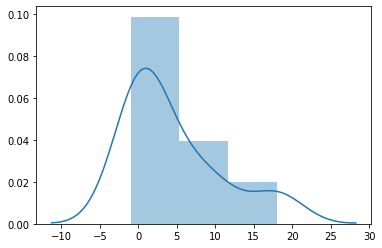

In [15]:
sns.distplot(np.array(data).reshape(-1))
plt.show()

##### instanciando o objeto Normalize

In [16]:
normalizer = Normalizer().fit(data)

##### aplicando a normalização nos dados de exemplo utilizando a norma l2

In [17]:
data2 = normalizer.transform(data)
print(data2)

[[-0.4472136   0.89442719]
 [ 0.08304548  0.99654576]
 [ 0.          1.        ]
 [ 0.05547002  0.99846035]]


#### Alterando a forma dos dados para apenas uma dimensão

In [18]:
data2 = data2.reshape(-1)

#### valor da média

In [19]:
print(np.mean(data2))

0.4475919008033141


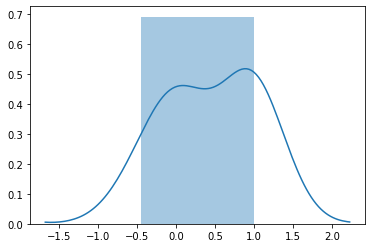

In [20]:
sns.distplot(data2)
plt.show()

### Técnicas de pre-processamento de Dados - Standartization

In [21]:
data = np.random.normal(size = 50)
print(data)

[ 0.6854247  -0.65536441  1.77763919  1.70703361 -0.11973284  0.57112684
  0.66842883 -1.37527675 -0.82525821  0.96280376  1.37463574 -0.37675921
 -1.29675645  1.77053542  0.86871167  0.12056361  0.88129402 -0.50403315
  0.10716271  0.30682043  1.37935811  1.31252182 -1.08746871 -1.66624373
 -1.86334339 -0.49198846 -1.78477178 -0.68593065 -0.01520329  0.34187376
  0.21787171  1.98668233 -0.66306304  0.52831238 -1.05073105  0.41418282
  0.67419287 -1.6277092  -1.14617552  1.19440986  0.05134577  2.41063295
  0.25747976 -0.85009962  0.81924134  0.20839174 -2.77889756  0.4813577
 -1.54811714 -1.85334393]


#### Alterando a forma dos dados para apenas uma dimensão

In [22]:
data = data.reshape(-1,1)

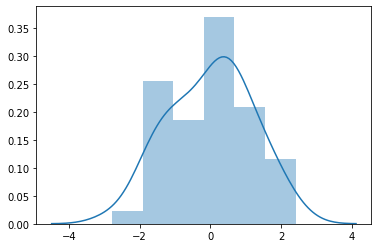

In [23]:
sns.distplot(data)
plt.show()

##### importando as bibliotecas necessárias.

In [24]:
from sklearn.preprocessing import MinMaxScaler

##### instânciando o objeto scaler

In [25]:
scaler = MinMaxScaler().fit(data)

##### transformando os dados com o objeto scaler

In [26]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[0.66755986]
 [0.40919562]
 [0.87802485]
 [0.86441946]
 [0.5124095 ]
 [0.64553516]
 [0.66428483]
 [0.27047164]
 [0.37645782]
 [0.7210096 ]
 [0.80036783]
 [0.46288163]
 [0.28560216]
 [0.87665599]
 [0.70287846]
 [0.55871358]
 [0.70530303]
 [0.4383565 ]
 [0.55613129]
 [0.59460446]
 [0.80127782]
 [0.78839875]
 [0.325931  ]
 [0.21440356]
 [0.17642331]
 [0.44067746]
 [0.19156372]
 [0.40330564]
 [0.53255189]
 [0.60135909]
 [0.57746443]
 [0.91830656]
 [0.40771213]
 [0.637285  ]
 [0.33301019]
 [0.61529273]
 [0.66539553]
 [0.221829  ]
 [0.31461845]
 [0.76563909]
 [0.5453756 ]
 [1.        ]
 [0.58509673]
 [0.37167099]
 [0.69334575]
 [0.57563768]
 [0.        ]
 [0.62823704]
 [0.23716604]
 [0.17835017]]


#### Alterando a forma dos dados para apenas uma dimensão

In [27]:
data_scaled = data_scaled.reshape(-1,1)

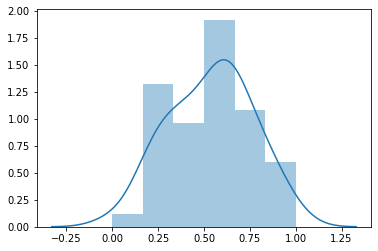

In [28]:
sns.distplot(data_scaled)
plt.show()

# StandardScaler - Técnica de Pré-Processamento

* Padroniza a escala dos dados sem interferir na sua forma

* Mantém a escala dos dados mais fiel que a Técnica MinMaxScale

In [29]:
data = np.random.normal(size = 50)
print(data)

[-0.54804312  0.44904922  0.28400641 -0.13772247 -1.06160053  2.10562854
  0.24169929  0.3774003   1.19523712 -0.78290582  0.07911516  0.97965084
  0.57228439  0.06578512  2.05569813 -0.43574176  0.23153532 -0.85569543
  0.11327947 -1.53080954 -0.27616504  0.21387629  0.70738757  0.65714547
 -0.79281699  0.0034108   0.20365418  1.45221466  0.40798253 -1.38241002
 -0.64623906  0.76381775 -1.02888013  1.77283753 -1.79162936 -1.59320091
  0.80707345 -1.25524956 -0.73270361  1.43958464 -2.42233094  0.35000494
 -0.04859422 -0.82726479  0.93169802  0.42882309 -1.18225754 -1.35053927
 -0.18259687  0.06892928]


#### Alterando a forma dos dados para apenas uma dimensão

In [30]:
data = data.reshape(-1,1)

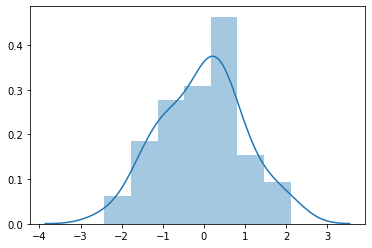

In [31]:
sns.distplot(data)
plt.show()

##### importando as bibliotecas necessárias.

In [32]:
from sklearn.preprocessing import StandardScaler

##### instânciando o objeto scaler

In [33]:
scaler = StandardScaler().fit(data)

##### transformando os dados com o objeto scaler

In [34]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[-0.5105548 ]
 [ 0.48779572]
 [ 0.32254465]
 [-0.09971638]
 [-1.02476023]
 [ 2.14646537]
 [ 0.28018415]
 [ 0.41605638]
 [ 1.23492519]
 [-0.74571386]
 [ 0.11739486]
 [ 1.01906687]
 [ 0.61118639]
 [ 0.10404799]
 [ 2.09647196]
 [-0.39811173]
 [ 0.27000735]
 [-0.81859532]
 [ 0.15160228]
 [-1.49456131]
 [-0.23833365]
 [ 0.25232603]
 [ 0.74646004]
 [ 0.69615455]
 [-0.75563753]
 [ 0.04159497]
 [ 0.24209102]
 [ 1.49222699]
 [ 0.4466772 ]
 [-1.34597453]
 [-0.60887464]
 [ 0.80296143]
 [-0.99199854]
 [ 1.81325443]
 [-1.75571024]
 [-1.55703141]
 [ 0.84627171]
 [-1.21865361]
 [-0.6954483 ]
 [ 1.47958103]
 [-2.38720767]
 [ 0.38862645]
 [-0.01047568]
 [-0.7901288 ]
 [ 0.97105354]
 [ 0.46754406]
 [-1.1455695 ]
 [-1.31406356]
 [-0.14464741]
 [ 0.10719612]]


#### Alterando a forma dos dados para apenas uma dimensão

In [35]:
data_scaled = data_scaled.reshape(-1,1)

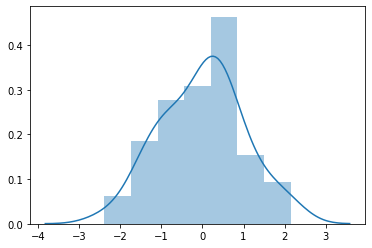

In [36]:
sns.distplot(data_scaled)
plt.show()